In [104]:
import pystan
from matplotlib import pylab as plt
%matplotlib inline 
import numpy as np

# The following example is from the PyStan getting started manual, (Gelman 2003)

In [3]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)

In [6]:
print(fit)

Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          8.1    0.26   5.07  -1.74   4.72   8.08  11.36  18.88  394.0    1.0
tau        6.67    0.26   5.32   0.29   2.81   5.41    9.3  19.42  417.0   1.01
eta[0]      0.4    0.04   0.97  -1.53  -0.24   0.41   1.08   2.29  575.0    1.0
eta[1]    -0.06    0.04   0.89  -1.85  -0.65  -0.09   0.55   1.75  560.0    1.0
eta[2]    -0.23    0.04   0.93  -2.07  -0.83  -0.23   0.37   1.69  573.0    1.0
eta[3]    -0.03    0.04   0.87  -1.61  -0.62  -0.05   0.57   1.58  606.0    1.0
eta[4]    -0.35    0.04   0.83  -1.99  -0.88  -0.36   0.16   1.33  500.0    1.0
eta[5]    -0.26    0.04   0.89  -2.01  -0.85  -0.26   0.33    1.5  552.0    1.0
eta[6]     0.33    0.04   0.89  -1.49  -0.25   0.33   0.92   2.05  585.0    1.0
eta[7]     0.

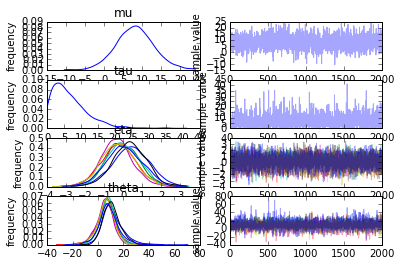

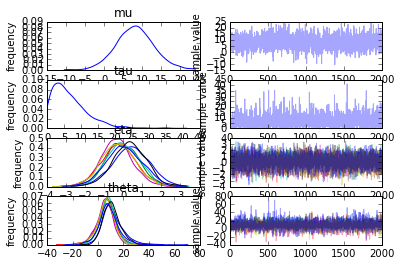

In [44]:
fit.plot()

# 

# Linear regression model

To get more acquainted with the stan, I played with a linear model and tried to change the data a little.

In [212]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real x[J]; // estimated treatment effects
    real y[J]; // s.e. of effect estimates
}
parameters {
    real<lower=0> err;
    real b;
    real c;
}
model {
    for (j in 1:J)
        y[j] ~ normal(b*x[j]+c, err);
 
}
"""

s=range(0,100)
schools_dat = {'J': 100,
               'x': [t for t in s],
               'y': [np.random.normal(t,2)+10 for t in s]}

fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)

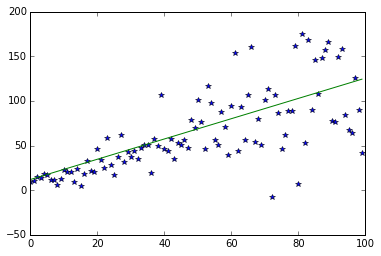

In [208]:
plt.plot(fit.data['x'],fit.data['y'],'*')
plt.plot(fit['b'][-1]*np.array(s)+fit['c'][-1])

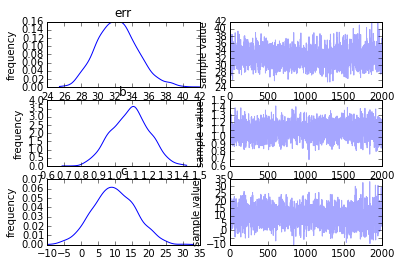

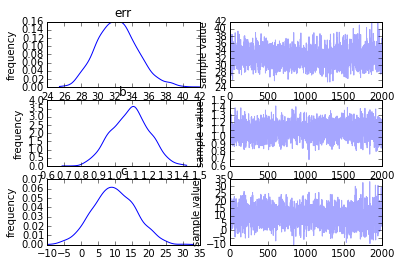

In [207]:
fit.plot()

___________________________________________________________________________

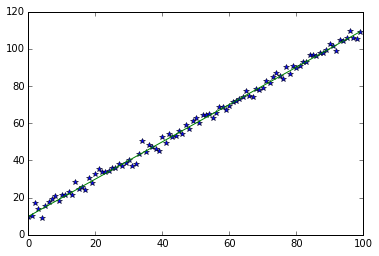

In [213]:
#Another set of data
plt.plot(fit.data['x'],fit.data['y'],'*')
plt.plot(fit['b'][-1]*np.array(s)+fit['c'][-1])

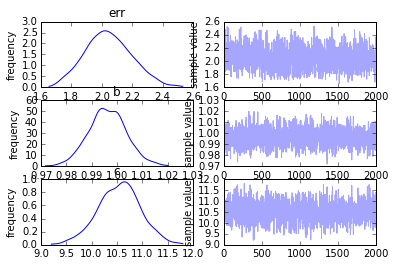

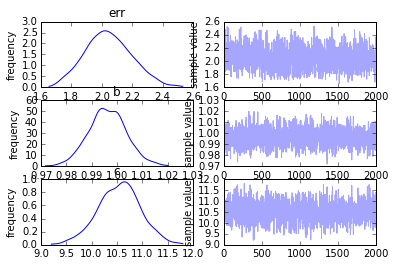

In [214]:
fit.plot() # we note the variance on err,c and b is lower than we data has more noise in it